# Numerical integration on time axis

A series of values, measurements of photosynthesis, need to be integrated using the trapezoid integration rule.

The values are located along a time-aware x-axis, but their interval is irregular.

The photosynthesis measurements are given in _assimilation rate_, with units $[ \mu mol \cdot m^{-2} \cdot s{-1} ]$, micromol of $CO_2$ per leaf unit area.

We would like to estimate the amount of $CO_2$ that was assimilated (per squared meter) in total every hour, 5 values in total, with units $ [ \mu mol \cdot m^{-2} ] $.

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import integrate

## Create a pandas Data Frame with measurements of photosynthesis (alternatively, read from the csv file)

In [12]:
import io

In [23]:
data = io.StringIO('''
timestamp,net photosynthesis
2018-02-07 12:36:43,-0.39879438321884403
2018-02-07 12:51:12,0.135978128426891
2018-02-07 12:56:13,-0.7930846441359749
2018-02-07 13:01:14,-0.590648929656498
2018-02-07 13:06:15,-0.19000606536865197
2018-02-07 13:11:16,0.0244729995727539
2018-02-07 13:16:17,0.26532832278481
2018-02-07 13:21:18,0.620115407307943
2018-02-07 13:26:19,0.723084316977972
2018-02-07 13:31:20,0.8460396875309041
2018-02-07 13:36:21,0.788240892404995
2018-02-07 13:41:22,1.74539465525794
2018-02-07 13:46:24,1.6528649708581298
2018-02-07 13:51:24,1.05855694939108
2018-02-07 13:56:24,0.8644795235388921
2018-02-07 14:01:24,1.0434821863144
2018-02-07 14:06:25,1.18902273396499
2018-02-07 14:11:26,1.4160893696560999
2018-02-07 14:16:27,1.34536169744601
2018-02-07 14:21:28,1.3675988769531298
2018-02-07 14:26:29,1.38999702331217
2018-02-07 14:31:30,1.27859877321286
2018-02-07 14:36:31,1.10195971446432
2018-02-07 14:41:32,0.230423651801215
2018-02-07 14:46:33,-0.0254839418795162
2018-02-07 14:51:34,-0.28555815386924
2018-02-07 14:56:35,-0.4418415292723929
2018-02-07 15:01:36,-0.144865578355881
2018-02-07 15:06:37,0.20654406213456697
2018-02-07 15:11:38,0.706924200057983
2018-02-07 15:16:39,0.83824196618272
2018-02-07 15:21:40,1.24323024871243
2018-02-07 15:26:41,2.1558448680933
2018-02-07 15:31:42,2.06717011422822
2018-02-07 15:36:42,1.9732468433869197
2018-02-07 15:41:42,1.99311330694901
2018-02-07 15:46:42,1.78377289214692
2018-02-07 15:51:42,1.3987265882400701
2018-02-07 15:56:42,0.9771203534779441
2018-02-07 16:01:42,0.9901481777180541
2018-02-07 16:06:43,0.9754457321410741
2018-02-07 16:11:44,0.965479273704966
2018-02-07 16:16:45,0.9835105325376559
2018-02-07 16:21:46,0.871787464275909
''')

In [24]:
df = pd.read_csv( data, parse_dates=['timestamp'] )

df.head()

,timestamp,net photosynthesis
0,2018-02-07 12:36:43,-0.398794
1,2018-02-07 12:51:12,0.135978
2,2018-02-07 12:56:13,-0.793085
3,2018-02-07 13:01:14,-0.590649
4,2018-02-07 13:06:15,-0.190006


## Set index to be time-aware, instead of the row number.

In [25]:
df.set_index( 'timestamp', inplace=True )

df.head()

,net photosynthesis
timestamp,
2018-02-07 12:36:43,-0.398794
2018-02-07 12:51:12,0.135978
2018-02-07 12:56:13,-0.793085
2018-02-07 13:01:14,-0.590649
2018-02-07 13:06:15,-0.190006


In [26]:
df.index.min(), df.index.max()

(Timestamp('2018-02-07 12:36:43'), Timestamp('2018-02-07 16:21:46'))

In [ ]:
integrate.trapz

## Graph to check the data

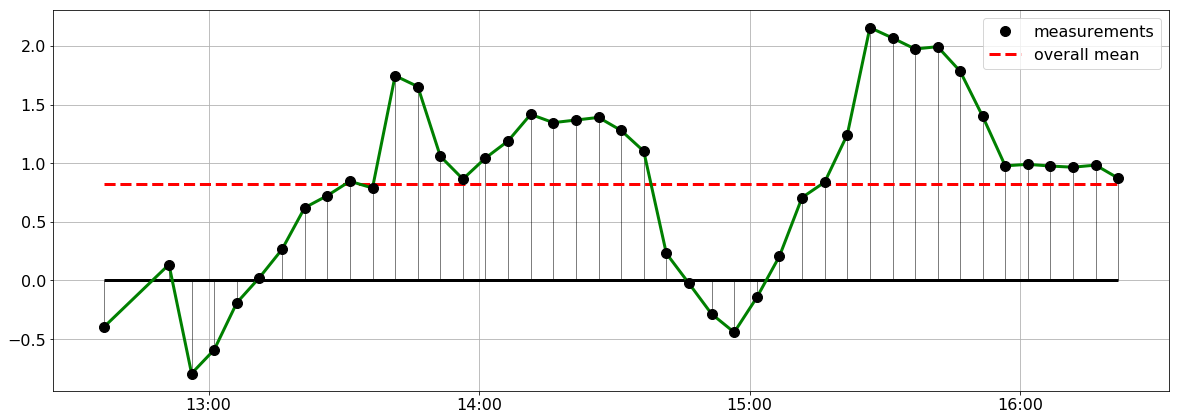

In [68]:
fig, ax = plt.subplots( figsize=( 20,7 ) )

ax.hlines( 0, df.index.min(), df.index.max(), color='black', linewidth=3, label='' ) # horizontal axis

ax.plot( df.index, df['net photosynthesis'], linewidth=3, color='green', label='' )
ax.plot( df.index, df['net photosynthesis'], linewidth=0, marker='o', markersize=10, color='black', label='measurements' )
ax.vlines( df.index, df['net photosynthesis'], 0, linewidth=0.5, label='' )

ax.hlines( df['net photosynthesis'].mean(), df.index.min(), df.index.max(), color='red', linestyle='--', linewidth=3, label='overall mean' )


ax.xaxis.set_major_locator( mdates.HourLocator() )
ax.xaxis.set_major_formatter( mdates.DateFormatter('%H:%M') )
ax.tick_params( axis='both', which='major', labelsize=16 )

ax.legend( fontsize=16 )
ax.grid()

plt.show()

## Integrate using `scipy.integrate.trapz`

### Expected order of magnitude

To know the order of magnitude of the expected result, we can assume a constant value of the mean, during the total amount of time.

To check how many seconds there are in total in that table:

In [38]:
( df.index.max() - df.index.min() )

Timedelta('0 days 03:45:03')

In [39]:
( df.index.max() - df.index.min() ).seconds

13503

The mean value is:

In [50]:
df['net photosynthesis'].mean()

0.82607075635018756

If we had a constant assimilation rate of $0.826 \mu mol \cdot m^{-2} \cdot s^{-1}$, during $13503$, we would have a total of:

In [52]:
df['net photosynthesis'].mean() * ( df.index.max() - df.index.min() ).seconds

11154.433422996583

We expect a result around that value to be reasonable.

### Integration with the trapezoidal rule

The main thing to take care of is that `integrate.trapz` uses nanoseconds to integrate. That means that if $x$ has units of time, then $dx=1ns$.

In [55]:
integrate.trapz( df['net photosynthesis'].values, x=df.index.astype(np.int64)/10**9 )

10783.429102673246

As a reference, the simple sum of values on that column:

In [34]:
df['net photosynthesis'].sum()

36.347113279408255

## Integrate for each full hour

### Naïve integral

Now that we know the mean value and the complete assimilation over the whole period, we know what to expect about the hourly values.

From the graph, we can have a first guess:

We expect only the value at 13:00 to be negative.

At 14:00 and 15:00 we can get a value around the reference, possibly below it. 

At 16:00 we will probably get a value above the reference, and at 17:00 we must get a value above, since all meareuments after 16:00 are bigger.

The reference is defined by the naïve method before: average $\times$ number of seconds, and is:

In [60]:
df.groupby( by=df.index.hour ).mean()

,net photosynthesis
timestamp,
12,-0.351967
13,0.650660
14,0.800804
15,1.266589
16,0.957274


In [81]:
def secs( x ):
    return ( x.index.max() - x.index.min() ).seconds

In [82]:
df.groupby( by=df.index.hour ).agg( secs )

,net photosynthesis
timestamp,
12,1170.0
13,3310.0
14,3311.0
15,3306.0
16,1204.0


In [83]:
df_mean_hours = df.groupby( by=df.index.hour ).mean()
df_mean_hours[ 'seconds' ] = df.groupby( by=df.index.hour ).agg( secs )
df_mean_hours.columns = [ 'mean', 'seconds' ]
df_mean_hours[ 'naïve integral' ] = df_mean_hours['mean'] * df_mean_hours['seconds']
df_mean_hours

,mean,seconds,naïve integral
timestamp,,,
12,-0.351967,1170.0,-411.801351
13,0.650660,3310.0,2153.685353
14,0.800804,3311.0,2651.462707
15,1.266589,3306.0,4187.343748
16,0.957274,1204.0,1152.558180


Ok, those are our reference values, if the photosynthesis were constant each hour (or we had a single measurement per hour, for that matter).

### Trapezoidal rule

In [84]:
def integrate_trapz( x ):
    return integrate.trapz( x['net photosynthesis'].values, x=x.index.astype(np.int64)/10**9 )

In [86]:
df_trapz_hours = df.groupby( by=df.index.hour ).agg( integrate_trapz )
df_trapz_hours

,net photosynthesis
timestamp,
12,-213.088193
13,2308.355138
14,2801.957852
15,4440.994681
16,1160.476411


That's the result! 

The next code is only to make it easier to plot those data.

In [129]:
timeindex = pd.DatetimeIndex( start=df.index.min(), end=df.index.max(), freq='5min' )

df_int = pd.DataFrame( index=timeindex, columns=['average', 'naïve'] )

for item in df_trapz_hours.index:
    df_int.loc[ df_int.index.hour==item, 'average'] = df_trapz_hours.loc[item]['net photosynthesis']
    df_int.loc[ df_int.index.hour==item, 'naïve'] = df_mean_hours.loc[item][ 'naïve integral' ]    

df_int.head()

,average,naïve
2018-02-07 12:36:43,-213.088,-411.801
2018-02-07 12:41:43,-213.088,-411.801
2018-02-07 12:46:43,-213.088,-411.801
2018-02-07 12:51:43,-213.088,-411.801
2018-02-07 12:56:43,-213.088,-411.801


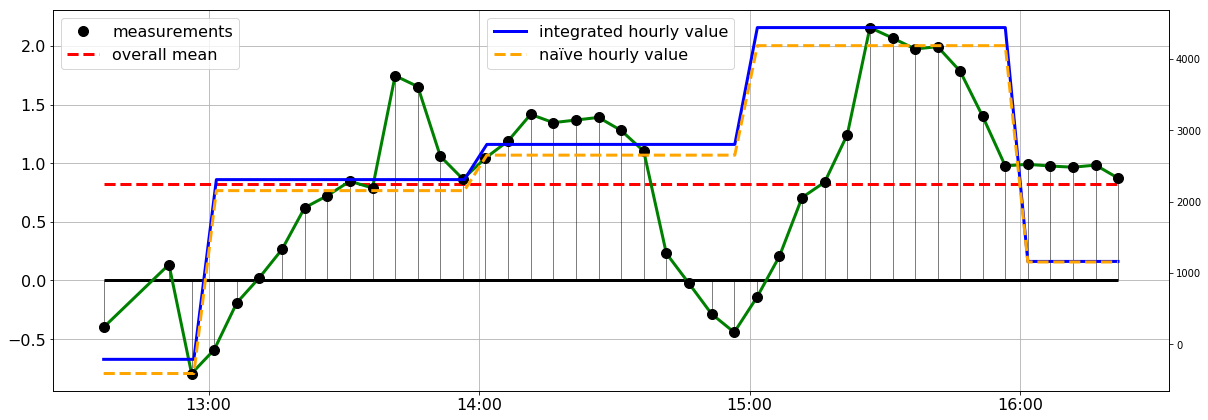

In [136]:
fig, ax = plt.subplots( figsize=( 20,7 ) )

ax.hlines( 0, df.index.min(), df.index.max(), color='black', linewidth=3, label='' ) # horizontal axis

ax.plot( df.index, df['net photosynthesis'], linewidth=3, color='green', label='' )
ax.plot( df.index, df['net photosynthesis'], linewidth=0, marker='o', markersize=10, color='black', label='measurements' )
ax.vlines( df.index, df['net photosynthesis'], 0, linewidth=0.5, label='' )

ax.hlines( df['net photosynthesis'].mean(), df.index.min(), df.index.max(), color='red', linestyle='--', linewidth=3, label='overall mean' )

axR = ax.twinx()
axR.yaxis.tick_right()
axR.plot( df_int.index, df_int['average'], linewidth=3, color='blue', label='integrated hourly value' )
axR.plot( df_int.index, df_int['naïve'], linewidth=3, linestyle='--', color='orange', label='naïve hourly value' )

ax.xaxis.set_major_locator( mdates.HourLocator() )
ax.xaxis.set_major_formatter( mdates.DateFormatter('%H:%M') )
ax.tick_params( axis='both', which='major', labelsize=16 )

ax.legend( loc='upper left', fontsize=16 )
ax.grid()
axR.legend( loc='upper center', fontsize=16 )

plt.show()

---